## Modeling of the third order system example using Python

| Name | OKUNOWO, Similoluwa Adetoyosi |
|---|---|
| Matric. Number | EEG/2016/095 |

Transfer function = $\cfrac{3}{s^3 + 2s^2 + 3s + 1}$

In [ ]:
### Import Required Libraries

In [1]:
# Install the required libraries in your Python environment
!pip install -q numpy scipy matplotlib

In [2]:
# Import the require libraries
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

### Using the transfer function directly

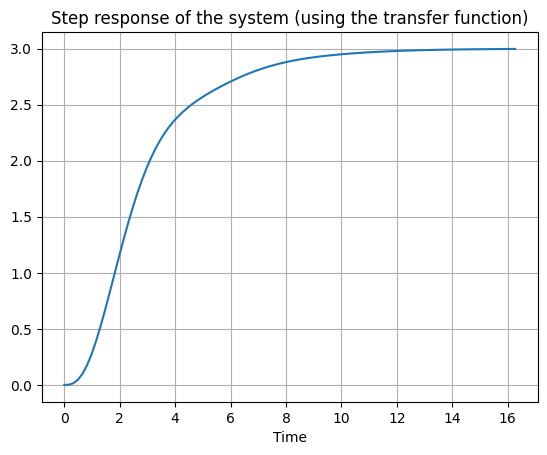

In [53]:
# Define the transfer function numerator and denominator polynomial
num = [3]
den = [1, 2, 3, 1]

# Define the transfer function 
tf = signal.TransferFunction(num, den)

# Obtain the step response
t, y_s = signal.step(tf)

# Plot the step response
plt.plot(t, y_s)
plt.xlabel("Time")
plt.title("Step response of the system (using the transfer function)")
plt.grid(True)
plt.show()


### Using the time domain representation

Convert the system from s-domain to t-domain by taking the inverse Laplace transform:

$\cfrac{Y(s)}{U(s)} = \cfrac{3}{s^3 + 2s^2 + 3s+ 1}$

$s^3.Y(s) + 2s^2.Y(s) + 3s.Y(s) + Y(s) = 3.U(s)$

Taking the inverse Laplace transform of both sides assuming zero initial conditions i.e. $y(0) = 0, y^{'}(0) = 0, y^{''}(0) = 0$:

$\cfrac{d^3y(t)}{dt^3} + 2.\cfrac{d^2y(t)}{dt^2} + 3.\cfrac{dy(t)}{dt} + y(t) = 3.u(t)$

$y^{'''} + 2y^{''} + 3y^{'} + y = 3u$

$y^{'''} = 3u - 2y^{''} - 3y^{'} - y$

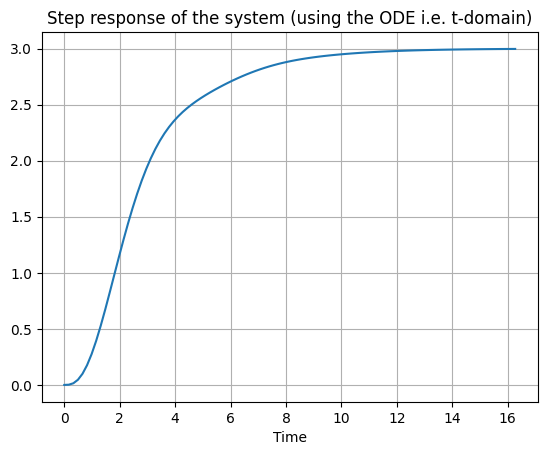

In [54]:
# Define the initial values of the system
y0 = [0, 0, 0] 

# Define the simulation time span
# t = np.linspace(0, 10, 1000)

# Define the step function
def step(t):
    return 1*(t > 0)

# Define the system's ODE
def sys(y_init: tuple, t: np.ndarray):
    u = step(t)
    dydt = [y_init[1], y_init[2], (3*u - y_init[0] - 3*y_init[1] - 2*y_init[2])]
    return dydt 

# Numerical integration
y_t = odeint(sys, y0, t)

plt.plot(t, y_t[:, 0])
plt.xlabel("Time")
plt.title("Step response of the system (using the ODE i.e. t-domain)")
plt.grid(True)
plt.show()

### Comparing the response using the transfer function and the t-domain representation (ODEs)

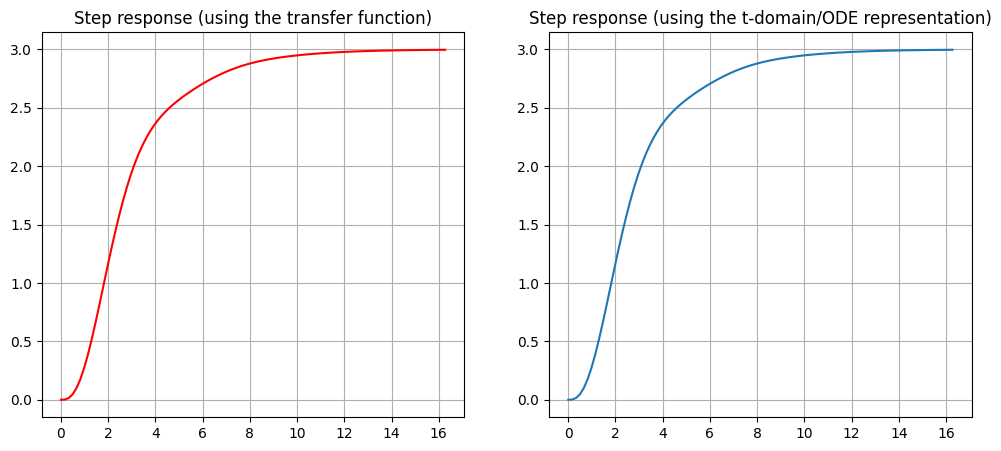

In [58]:
fig, ax = plt.subplots(
    nrows = 1,
    ncols = 2, 
    figsize = (12, 5)
)

ax[0].plot(t, y_s, 'r')
ax[0].set_title("Step response (using the transfer function)")
ax[0].grid(True)

ax[1].plot(t, y_t[:, 0])
ax[1].set_title("Step response (using the t-domain/ODE representation)")
ax[1].grid(True)

The responses are observed to be similar as expected.